In [1]:
from matchms.importing import load_from_mgf
from tqdm import tqdm
import os 

pos_model_file_name="../../../data/pytorch/new_corinna_included/trained_models/positive_mode_precursor_mz_ionmode_10000_layers_500_embedding_2024_11_26_11_30_47/ms2deepscore_model.pt"
neg_model_file_name="../../../data/pytorch/new_corinna_included/trained_models/negative_mode_precursor_mz_ionmode_10000_layers_500_embedding_2024_11_26_18_35_07/ms2deepscore_model.pt"

pos_test = list(tqdm(load_from_mgf("../../../data/pytorch/new_corinna_included/training_and_validation_split/positive_testing_spectra.mgf")))
neg_test = list(tqdm(load_from_mgf("../../../data/pytorch/new_corinna_included/training_and_validation_split/negative_testing_spectra.mgf")))

24911it [00:12, 2054.78it/s]
7142it [00:03, 1800.35it/s]


### For one spectrum no fingerprint can be generated by RDKIT, this spectrum is removed. 
RDkit is not able to create a fingerprint for the smiles "O=C(N(CCN(CCN(C)[Na+])C(C)=O)CCN(CCN(CCN(C(C)=O)CCN(C)C(C)=O)C(C)=O)C(C)=O)C" therefore no tanimoto score can be calculated. So it can not be used for benchmarking the models.

In [2]:
pos_test_spectra = []
for spectrum in pos_test:
    if spectrum.get("inchikey")[:14] != "FTXGVGWYYREYSV":
        pos_test_spectra.append(spectrum)

In [3]:
from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes
scores_neg_model = CalculateScoresBetweenAllIonmodes(neg_model_file_name, pos_test_spectra, neg_test, fingerprint_type="daylight", n_bits_fingerprint=4096)
scores_pos_model = CalculateScoresBetweenAllIonmodes(pos_model_file_name, pos_test_spectra, neg_test, fingerprint_type="daylight", n_bits_fingerprint=4096)

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


24910it [00:46, 534.97it/s]
7142it [00:08, 794.85it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 383.87it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:30, 827.99it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 401.67it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:08, 807.97it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 387.60it/s]


Calculating tanimoto scores


/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


24910it [00:30, 819.54it/s]
7142it [00:08, 807.21it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 380.03it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:30, 820.30it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 398.53it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:08, 799.09it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 390.10it/s]


Calculating tanimoto scores


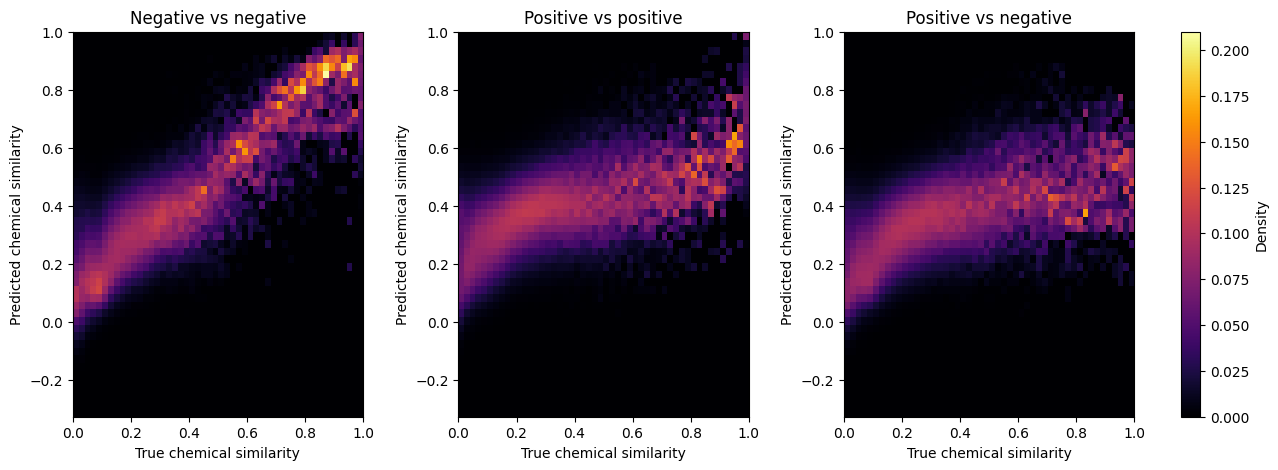

In [13]:
from ms2deepscore.benchmarking.plot_heatmaps import create_3_heatmaps
fig = create_3_heatmaps(scores_neg_model, 50)
fig.savefig("./figures_benchmarking/heatmap_single_ionmode_negative.svg")

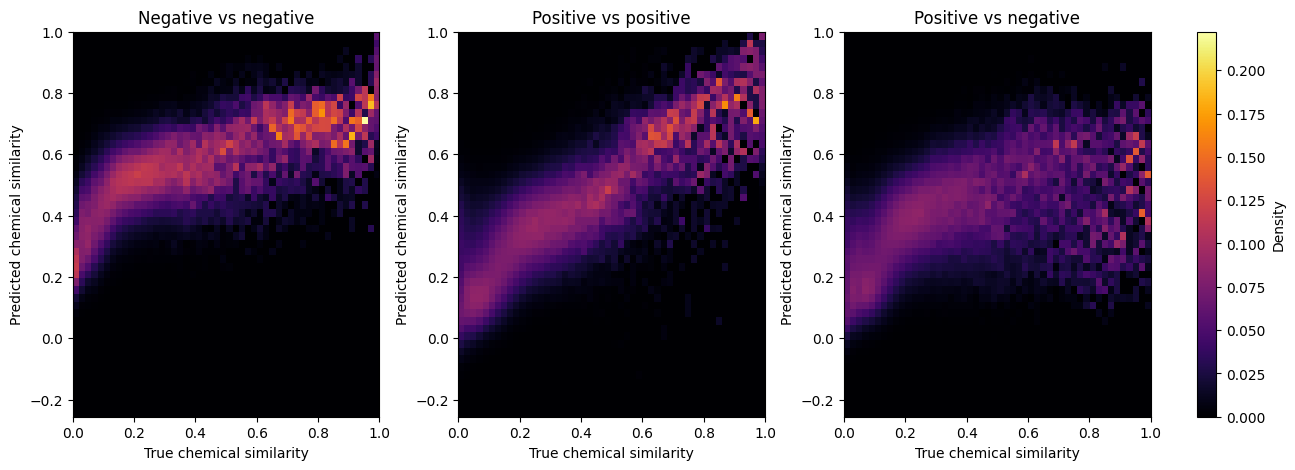

In [14]:
from ms2deepscore.benchmarking.plot_heatmaps import create_3_heatmaps
fig = create_3_heatmaps(scores_pos_model, 50)
fig.savefig("./figures_benchmarking/heatmap_single_ionmode_positive.svg")

# Get MSE for specific mode

In [15]:
from ms2deepscore.utils import create_evenly_spaced_bins
neg_neg_scores_neg_model = CalculateScoresBetweenAllIonmodes(neg_model_file_name, neg_test, neg_test, fingerprint_type="daylight", n_bits_fingerprint=4096)
tanimoto_bins = create_evenly_spaced_bins(10)
mse_over_bins = neg_neg_scores_neg_model.pos_vs_pos_scores.get_average_loss_per_bin_per_inchikey_pair(loss_type="MSE", tanimoto_bins=tanimoto_bins)
average_mse_per_bin_neg_neg = sum(mse_over_bins[1])/len(mse_over_bins[1])
average_mse_per_bin_neg_neg

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


7142it [00:10, 706.41it/s]
7142it [00:10, 710.38it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 381.75it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:09, 754.32it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 384.50it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:09, 745.23it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 377.16it/s]


Calculating tanimoto scores


Selecting available inchikey pairs per bin: 10it [00:00, 204.46it/s]


0.027159976357235143

In [16]:
pos_pos_scores_pos_model = CalculateScoresBetweenAllIonmodes(pos_model_file_name, pos_test_spectra, pos_test_spectra, fingerprint_type="daylight", n_bits_fingerprint=4096)
tanimoto_bins = create_evenly_spaced_bins(10)
mse_over_bins = pos_pos_scores_pos_model.pos_vs_pos_scores.get_average_loss_per_bin_per_inchikey_pair(loss_type="MSE", tanimoto_bins=tanimoto_bins)
average_mse_per_bin_pos_pos = sum(mse_over_bins[1])/len(mse_over_bins[1])
average_mse_per_bin_pos_pos

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


24910it [00:33, 746.26it/s]
24910it [00:32, 763.88it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 388.26it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:33, 735.78it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:05<00:00, 354.70it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:32, 768.73it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 382.59it/s]


Calculating tanimoto scores


Selecting available inchikey pairs per bin: 10it [00:00, 53.16it/s]


0.03681962919492708

#### And now for the cross ion mode model

In [17]:
pos_pos_scores_pos_model = CalculateScoresBetweenAllIonmodes("ms2deepscore_model.pt", pos_test_spectra, pos_test_spectra, fingerprint_type="daylight", n_bits_fingerprint=4096)
tanimoto_bins = create_evenly_spaced_bins(10)
mse_over_bins = pos_pos_scores_pos_model.pos_vs_pos_scores.get_average_loss_per_bin_per_inchikey_pair(loss_type="MSE", tanimoto_bins=tanimoto_bins)
average_mse_per_bin_pos_pos = sum(mse_over_bins[1])/len(mse_over_bins[1])
average_mse_per_bin_pos_pos

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


24910it [00:33, 740.14it/s]
24910it [00:34, 727.20it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 392.04it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:32, 765.65it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 398.47it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:32, 766.65it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 396.47it/s]


Calculating tanimoto scores


Selecting available inchikey pairs per bin: 10it [00:00, 53.15it/s]


0.03754818445277861

In [18]:
neg_neg_scores_neg_model = CalculateScoresBetweenAllIonmodes("ms2deepscore_model.pt", neg_test, neg_test, fingerprint_type="daylight", n_bits_fingerprint=4096)
tanimoto_bins = create_evenly_spaced_bins(10)
mse_over_bins = neg_neg_scores_neg_model.pos_vs_pos_scores.get_average_loss_per_bin_per_inchikey_pair(loss_type="MSE", tanimoto_bins=tanimoto_bins)
average_mse_per_bin_neg_neg = sum(mse_over_bins[1])/len(mse_over_bins[1])
average_mse_per_bin_neg_neg

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


7142it [00:09, 739.85it/s]
7142it [00:09, 724.16it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 377.97it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:09, 756.21it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 366.51it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:10, 707.04it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 379.18it/s]


Calculating tanimoto scores


Selecting available inchikey pairs per bin: 10it [00:00, 200.69it/s]


0.032018205931960565

In [11]:
from typing import List

import numpy as np
from matplotlib import pyplot as plt

from ms2deepscore.validation_loss_calculation.PredictionsAndTanimotoScores import PredictionsAndTanimotoScores
from ms2deepscore.utils import create_evenly_spaced_bins

def plot_loss_per_bin_multiple_benchmarks(list_of_predictions_and_tanimoto_scores: List[PredictionsAndTanimotoScores],
                                          nr_of_bins=10,
                                          loss_type="MSE",
                                          title=""):
    """Combines the plot of multiple comparisons into one plot
    """
    ref_score_bins = create_evenly_spaced_bins(nr_of_bins)
    fig = plt.figure(figsize=(5,3))
    labels = []
    for predictions_and_tanimoto_scores in list_of_predictions_and_tanimoto_scores:
        bin_content, rmses = predictions_and_tanimoto_scores.get_average_loss_per_bin_per_inchikey_pair(
            loss_type, ref_score_bins)
        plt.plot(np.arange(len(rmses)), rmses, "o:")
        labels.append(predictions_and_tanimoto_scores.label)
    plt.title(title)
    plt.legend(labels)
    plt.ylabel(loss_type)
    plt.grid(True)
    plt.xlabel("tanimoto score bin")
    plt.xticks(np.arange(len(ref_score_bins)),
               [f"{a:.1f} to < {b:.1f}" for (a, b) in ref_score_bins], fontsize=9, rotation='vertical')
    plt.grid(True)
    plt.tight_layout()
    return fig

In [102]:
scores_neg_model.neg_vs_neg_scores.label = "negative single ion mode model"
neg_neg_scores_neg_model.neg_vs_neg_scores.label = "dual ion mode model"

Selecting available inchikey pairs per bin: 10it [00:00, 213.22it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 208.39it/s]


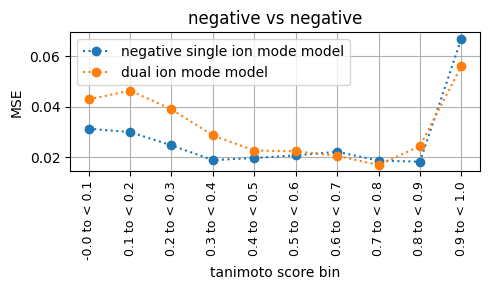

In [103]:
figure = plot_loss_per_bin_multiple_benchmarks([scores_neg_model.neg_vs_neg_scores, neg_neg_scores_neg_model.neg_vs_neg_scores], 10, "MSE", "negative vs negative")
figure.savefig("./figures_benchmarking/loss_per_bin_neg_neg.svg")

In [104]:
scores_pos_model.pos_vs_pos_scores.label="positive single ion mode model"
pos_pos_scores_pos_model.pos_vs_pos_scores.label="dual ion mode model"

Selecting available inchikey pairs per bin: 10it [00:00, 56.98it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 54.45it/s]


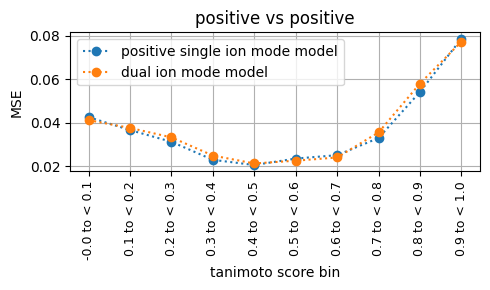

In [105]:
figure = plot_loss_per_bin_multiple_benchmarks([scores_pos_model.pos_vs_pos_scores, pos_pos_scores_pos_model.pos_vs_pos_scores], 10, "MSE", "positive vs positive")
figure.savefig("./figures_benchmarking/loss_per_bin_pos_pos.svg")

# Create violin plots

In [21]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
from ms2deepscore.utils import create_evenly_spaced_bins
from matplotlib import pyplot as plt

from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes
from ms2deepscore.utils import create_evenly_spaced_bins
import pandas as pd
def get_predictions_per_bin(predictions_and_tanimoto_scores,
                            average_per_inchikey_pair: pd.DataFrame,
                            tanimoto_bins: np.ndarray):
    """Compute average loss per Tanimoto score bin

    Parameters
    ----------
    average_per_inchikey_pair
        Precalculated average (prediction or loss) per inchikey pair
    ref_score_bins
        Bins for the reference score to evaluate the performance of scores. in the form [(0.0, 0.1), (0.1, 0.2) ...]
    """
    average_predictions = average_per_inchikey_pair.to_numpy()

    sorted_bins = sorted(tanimoto_bins, key=lambda b: b[0])

    bins = [bin_pair[0] for bin_pair in sorted_bins]
    bins.append(sorted_bins[-1][1])

    digitized = np.digitize(predictions_and_tanimoto_scores.tanimoto_df, bins, right=True)
    predictions_per_bin = []
    for i, bin_edges in tqdm(enumerate(sorted_bins), desc="Selecting available inchikey pairs per bin"):
        row_idxs, col_idxs = np.where(digitized == i+ 1)
        predictions_in_this_bin = average_predictions[row_idxs, col_idxs]
        predictions_in_this_bin_not_nan = predictions_in_this_bin[~np.isnan(predictions_in_this_bin)]
        predictions_per_bin.append(predictions_in_this_bin_not_nan)
    return predictions_per_bin

def plot_comparison_violinplot_three_panels(
    list_a,
    list_b,
    nr_of_bins: int
):
    bins = create_evenly_spaced_bins(nr_of_bins)
    bin_labels = [f"{a:.1f}–<{b:.1f}" for (a, b) in bins]

    n_panels = 3
    assert len(list_a) == n_panels and len(list_b) == n_panels, f"Expected {n_panels} sets of scores in each input"

    fig, axes = plt.subplots(
        2, n_panels, figsize=(5 * n_panels, 8),
        sharex='col',
        gridspec_kw={'height_ratios': [1, 4]},
        constrained_layout=True
    )

    def get_bin_data(scores):
        average_predictions = scores.get_average_prediction_per_inchikey_pair()
        return get_predictions_per_bin(scores, average_predictions, bins)

    def draw_stat_lines(ax, data, pos, side='left'):
        if len(data) == 0:
            return
        median = np.median(data)
        p1, p99 = np.percentile(data, [1, 99])

        if side == 'left':
            x_range = [pos - 0.3, pos]
        else:
            x_range = [pos, pos + 0.3]

        # Median line
        ax.plot(x_range, [median, median], color='black', lw=1.5)

        # 1st and 99th percentile lines
        # ax.plot(x_range, [p1, p1], color='black', lw=1, linestyle='dotted')
        # ax.plot(x_range, [p99, p99], color='black', lw=1, linestyle='dotted')

    x = np.arange(nr_of_bins)

    for i in range(n_panels):
        scores_a = list_a[i]
        scores_b = list_b[i]

        predictions_per_bin_a = get_bin_data(scores_a)
        predictions_per_bin_b = get_bin_data(scores_b)

        counts_a = [len(p) for p in predictions_per_bin_a]
        counts_b = [len(p) for p in predictions_per_bin_b]

        # === TOP BAR PLOTS ===
        bar_width = 0.4
        axes[0, i].bar(x - bar_width/2, counts_a, width=bar_width, label=scores_a.label, alpha=0.6)
        axes[0, i].bar(x + bar_width/2, counts_b, width=bar_width, label=scores_b.label, alpha=0.6)
        axes[0, i].set_yscale('log')
        axes[0, i].set_ylabel('Nr of pairs')
        axes[0, i].set_ylim(100, 2_000_000)
        axes[0, i].tick_params(axis='x', labelbottom=False)
        axes[0, i].legend()



        # === BOTTOM SPLIT VIOLIN PLOTS ===
        ax = axes[1, i]
        for j in range(nr_of_bins):
            data_left = predictions_per_bin_a[j]
            data_right = predictions_per_bin_b[j]
            pos = x[j]

            if len(data_left) > 1:
                kde_left = gaussian_kde(data_left)
                y = np.linspace(0, 1, 200)
                v = kde_left(y)
                v = 0.3 * v / v.max()
                ax.fill_betweenx(y, pos - v, pos, facecolor='#1f77b4', alpha=0.7)

            if len(data_right) > 1:
                kde_right = gaussian_kde(data_right)
                y = np.linspace(0, 1, 200)
                v = kde_right(y)
                v = 0.3 * v / v.max()
                ax.fill_betweenx(y, pos, pos + v, facecolor='#ff7f0e', alpha=0.7)

            draw_stat_lines(ax, data_left, pos, side='left')
            draw_stat_lines(ax, data_right, pos, side='right')

        ax.set_ylim(-0.05, 1.05)
        ax.set_ylabel("Predicted score")
        ax.set_xlabel("True chemical similarity")
        ax.set_xticks(x)
        ax.set_xticklabels(bin_labels, fontsize=9, rotation='vertical')
        axes[0, 0].set_title("Positive vs positive")
        axes[0, 1].set_title("Positive vs negative")
        axes[0, 2].set_title("Negative vs negative")

    return fig


In [ ]:
fig = plot_comparison_violinplot_three_panels([scores_neg_model.pos_vs_pos_scores, scores_neg_model.pos_vs_neg_scores, scores_neg_model.neg_vs_neg_scores],
                                              [scores_neg_model.pos_vs_pos_scores, scores_neg_model.pos_vs_neg_scores, scores_neg_model.neg_vs_neg_scores],
                                              10)

Selecting available inchikey pairs per bin: 10it [00:00, 58.82it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 59.30it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 121.42it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 122.19it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 245.94it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 253.05it/s]


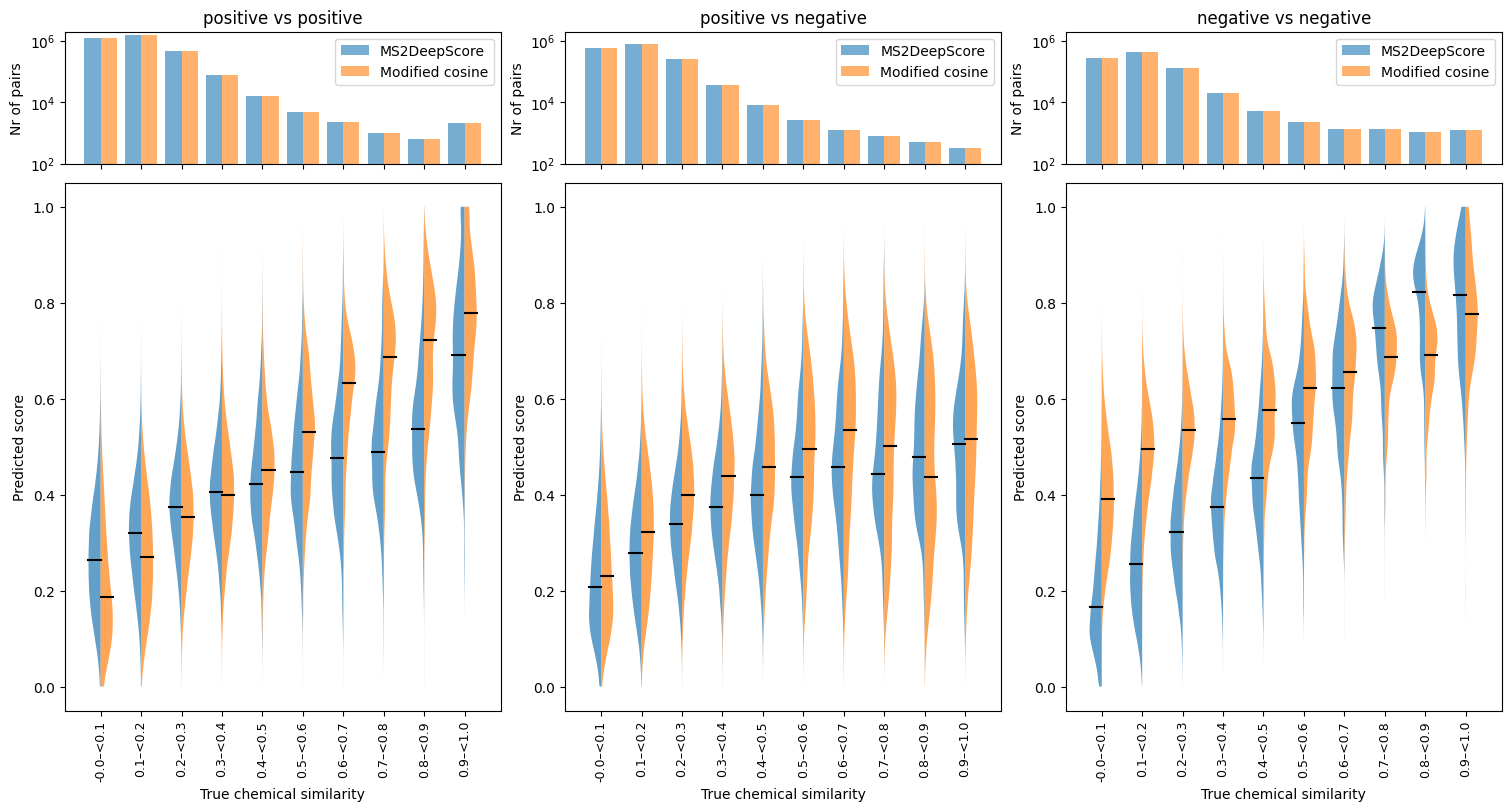

In [7]:
fig = plot_comparison_violinplot_three_panels([scores_neg_model.pos_vs_pos_scores, scores_neg_model.pos_vs_neg_scores, scores_neg_model.neg_vs_neg_scores],
                                              [scores_pos_model.pos_vs_pos_scores, scores_pos_model.pos_vs_neg_scores, scores_pos_model.neg_vs_neg_scores],
                                              10)

In [8]:
dual_ion_mode = CalculateScoresBetweenAllIonmodes("ms2deepscore_model.pt", pos_test_spectra, neg_test, fingerprint_type="daylight", n_bits_fingerprint=4096)

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


24910it [00:30, 826.86it/s]
7142it [00:08, 806.88it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 391.31it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [00:30, 821.75it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:04<00:00, 399.32it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:08, 798.91it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 387.72it/s]


Calculating tanimoto scores


In [14]:
scores_neg_model.neg_vs_neg_scores.label = "Negative single ion mode model"
scores_neg_model.pos_vs_pos_scores.label = "Negative single ion mode model"
scores_neg_model.pos_vs_neg_scores.label = "Negative single ion mode model"

scores_pos_model.neg_vs_neg_scores.label="Positive single ion mode model"
scores_pos_model.pos_vs_pos_scores.label="Positive single ion mode model"
scores_pos_model.pos_vs_neg_scores.label="Positive single ion mode model"

dual_ion_mode.neg_vs_neg_scores.label = "Dual ion mode model"
dual_ion_mode.pos_vs_pos_scores.label="Dual ion mode model"
dual_ion_mode.pos_vs_neg_scores.label="Dual ion mode model"

Selecting available inchikey pairs per bin: 10it [00:00, 60.99it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 60.64it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 125.84it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 125.29it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 255.78it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 255.34it/s]


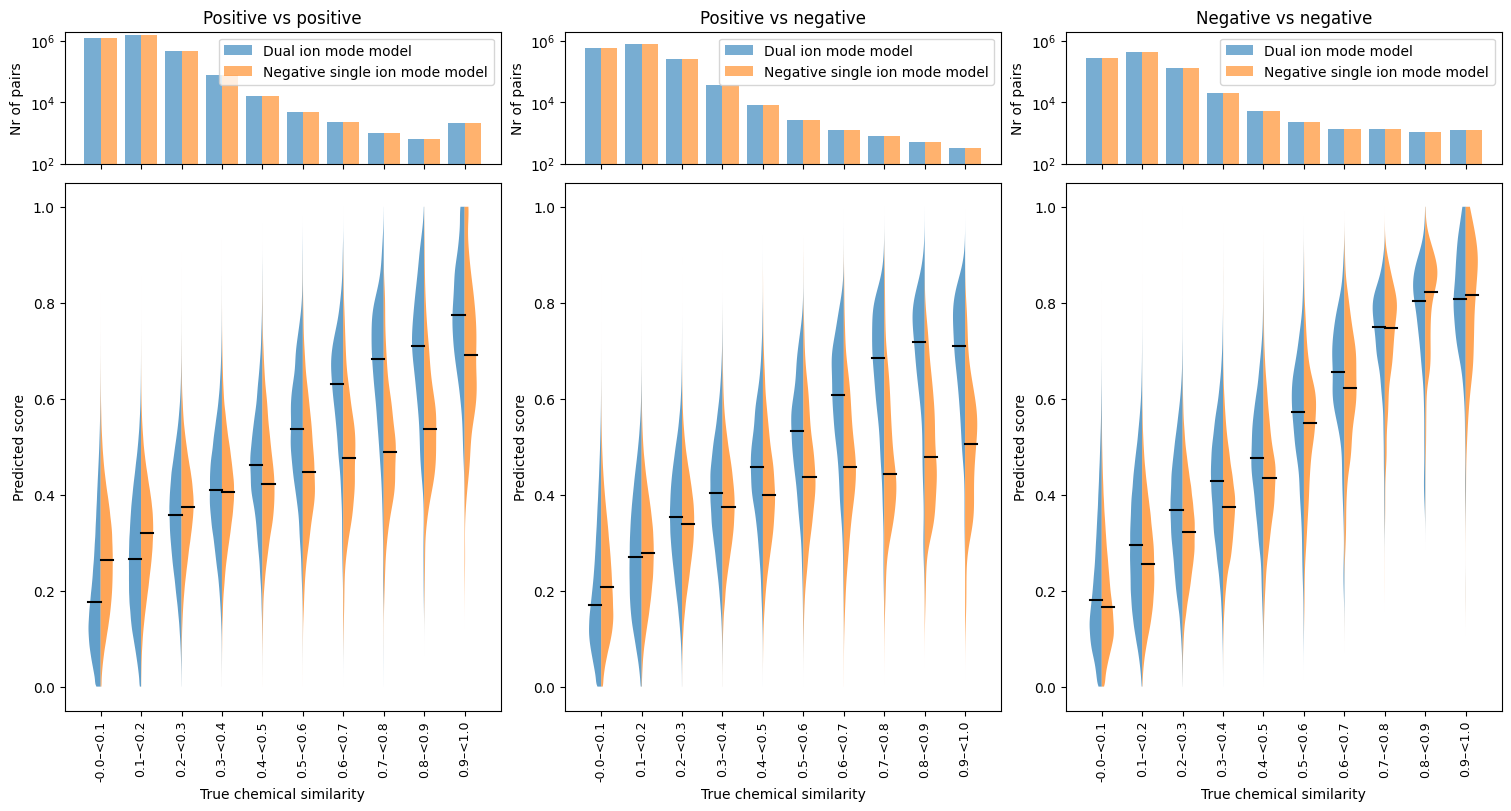

In [22]:
fig = plot_comparison_violinplot_three_panels([dual_ion_mode.pos_vs_pos_scores, dual_ion_mode.pos_vs_neg_scores, dual_ion_mode.neg_vs_neg_scores],
                                              [scores_neg_model.pos_vs_pos_scores, scores_neg_model.pos_vs_neg_scores, scores_neg_model.neg_vs_neg_scores],
                                              10)

In [23]:
fig.savefig('figures_benchmarking/violin_comparison_side_by_side_neg.svg',bbox_inches='tight')

Selecting available inchikey pairs per bin: 10it [00:00, 59.16it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 59.82it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 121.08it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 121.56it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 247.53it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 247.07it/s]


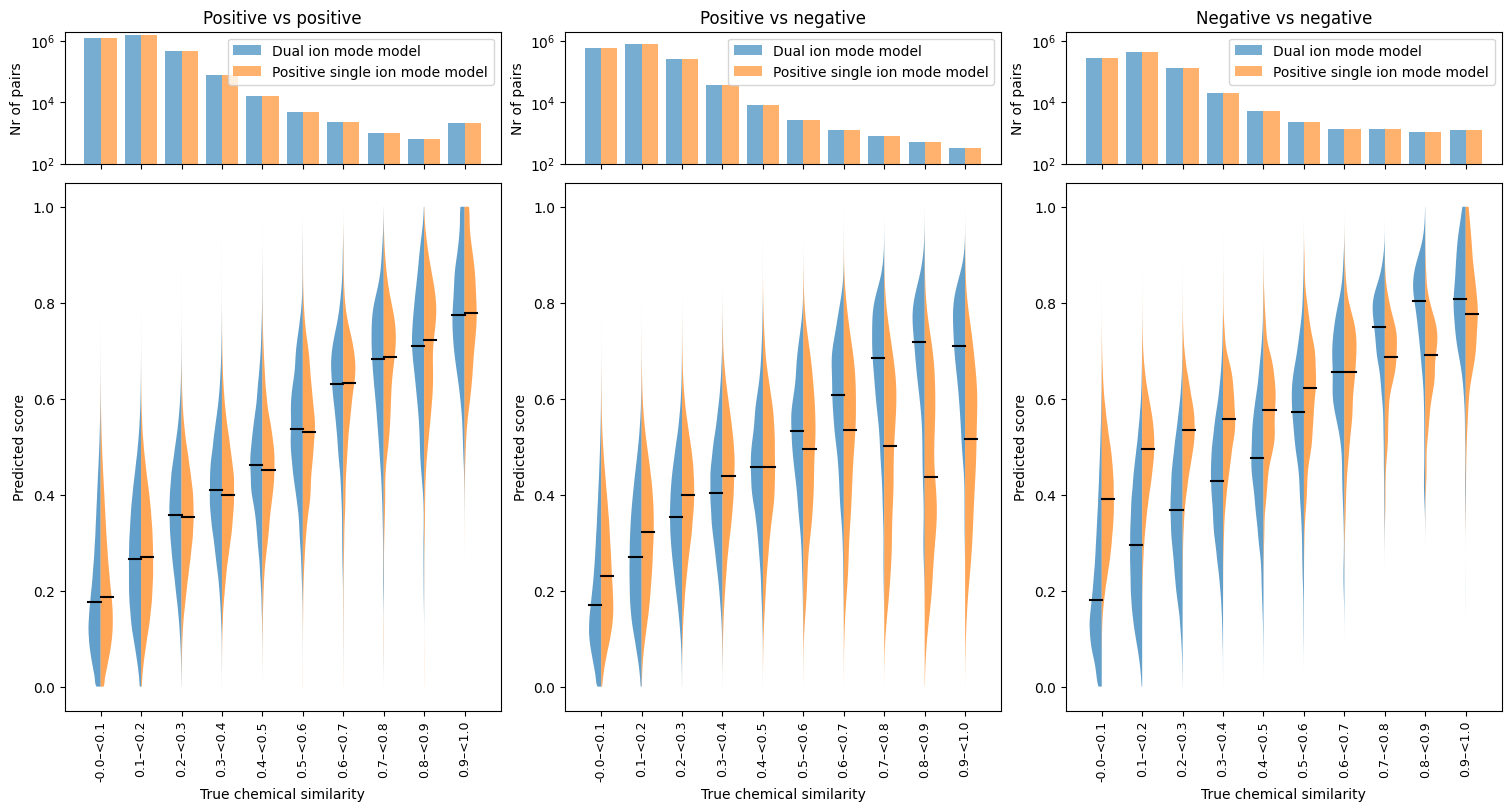

In [24]:
fig = plot_comparison_violinplot_three_panels([dual_ion_mode.pos_vs_pos_scores, dual_ion_mode.pos_vs_neg_scores, dual_ion_mode.neg_vs_neg_scores],
                                              [scores_pos_model.pos_vs_pos_scores, scores_pos_model.pos_vs_neg_scores, scores_pos_model.neg_vs_neg_scores],
                                              10)

In [25]:
fig.savefig('figures_benchmarking/violin_comparison_side_by_side_pos.svg',bbox_inches='tight')

Selecting available inchikey pairs per bin: 10it [00:00, 248.17it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 258.56it/s]


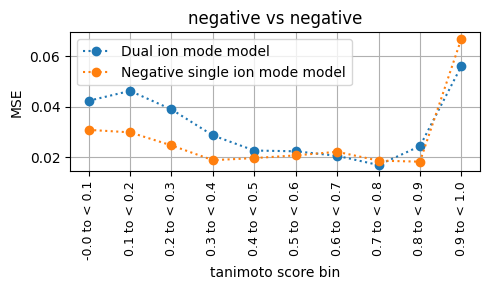

In [28]:
figure = plot_loss_per_bin_multiple_benchmarks([dual_ion_mode.neg_vs_neg_scores, scores_neg_model.neg_vs_neg_scores], 10, "MSE", "negative vs negative")
figure.savefig('figures_benchmarking/loss_per_bin_neg_neg.svg',bbox_inches='tight')

Selecting available inchikey pairs per bin: 10it [00:00, 58.95it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 59.07it/s]


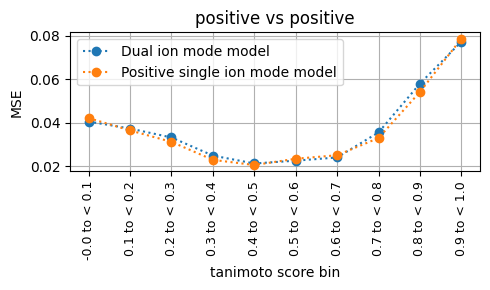

In [29]:
figure = plot_loss_per_bin_multiple_benchmarks([dual_ion_mode.pos_vs_pos_scores, scores_pos_model.pos_vs_pos_scores], 10, "MSE", "positive vs positive")
figure.savefig('figures_benchmarking/loss_per_bin_pos_pos.svg',bbox_inches='tight')